In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [ ]:
from IPython.display import display, Math, Latex
from __future__ import print_function
from __future__ import division

# Non-Linear Signal Processing: Exercise 4

This exercise is based on C.M.\ Bishop: *Pattern Recognition
and Machine Learning*, sections 1.1, 1.5.5, 3.1.1, 3.1.4, and 3.2.
The objective of the exercise is to use the software to
illustrate and discuss the generalization concept for linear models.

Print and comment on the figures produced in this notebook as outlined below at the three checkpoints.


### Linear Models
Let $y(\mathbf x)$ be a function of the vector \mathbf x, where
$\mathbf x=(x_1,\ldots,x_d)^\top$. To learn $y(\mathbf x)$  we are given a data-set, $\mathcal D = \left\{ (\mathbf x_n,t_n) \right\}$, $
n=1,\ldots,N$ of $N$ corresponding values of input (\mathbf x) and output $t$.

In this exercise we assume $y(\mathbf x)$ is a linear model
\begin{equation}
  y(\mathbf x) = w_0 + \sum_{i=1}^d w_i x_i \;\; = \;\; w_0 + \mathbf w^\top \mathbf x, \qquad (1)
\end{equation}
where $\mathbf w$ is a weight vector.

The term $w_0$ in equation (1) can be included in the
weight vector, \mathbf w, by modifying \mathbf x such that
$\mathbf x=(1,x_1,\ldots,x_d)^\top$. This reduces equation (2) to
\begin{equation}
  y(\mathbf x) = \sum_{i=0}^d w_i x_i \;\; = \;\; \mathbf w^\top \mathbf x. \qquad (2)
\end{equation}

The weight-vector, \mathbf w, for the given training-set
can be estimated by minimizing an error function. Here we shall use the
sum-of-squares error function augmented by a squared weight term corresponding to a Gaussian prior 
\begin{eqnarray}
  E(\mathbf w) &=& \frac{1}{2} \sum_{n=1}^N \left\{ y(\mathbf x_n;\mathbf w)-t_n \right\}^2 + \frac{1}{2}\alpha\mathbf w^2 \qquad (3)\\
       &=&  \frac{1}{2} \sum_{n=1}^N \left\{ \mathbf w^\top\mathbf x_n -t_n  \right\}^2 + \frac{1}{2}\alpha\mathbf w^2.\qquad (4)
\end{eqnarray}
The parameter $\alpha$ is a control parameter, sometimes referred to as the "weight decay".
Introducing the matrix, \mathbf X, where $\mathbf x^\top=(\mathbf x_1\; \mathbf x_2\; \ldots
\mathbf x_N)$ and the vector, $\mathbf t = (t_1, t_2,\ldots, t_N)^\top$,
equation (4) can be rewritten as
\begin{equation}
  E(\mathbf w) = \frac{1}{2} \left( \mathbf w^\top \mathbf X^\top \mathbf X \mathbf w + \mathbf t^\top \mathbf t -
  2\mathbf w^\top \mathbf X^\top \mathbf t  \right) + \frac{1}{2}\alpha\mathbf w^2. \qquad (5)
\end{equation}

Since equation (5) is quadratic in $\mathbf w$, the exact value
of $\mathbf w$ minimizing $E(\mathbf w)$ can be found analytically by equating the
derivative of equation (5) to zero. The derivative of can be performed using two rules $\frac{{\partial {\mathbf z}^T {\bf Bz}}}{{\partial {\mathbf z}}} = \left( {{\bf B} + {\bf B}^T } \right){\mathbf z}
$ and $\frac{{\partial {\mathbf z}^T {\bf a}}}{{\partial {\mathbf z}}} = \frac{{\partial {\bf a}^T {\mathbf z}}}{{\partial {\mathbf z}}} =  {\bf a}$. This gives the
normal equations for the least-squares problem:
\begin{equation}
  \left(\mathbf x^\top \mathbf x + \alpha {\bf 1}\right) \mathbf w = \mathbf x^\top \mathbf t.
\end{equation}
Where ${\bf 1}$ is a unit matrix. Solving for $\mathbf w$ gives the optimal $\mathbf w$.
Since $\mathbf X$ is an $N\times (d+1)$ matrix, $\mathbf X^\top \mathbf X$ is a $(d+1)\times
(d+1)$ square matrix. Thus the solution to equation (6) is
given by
\begin{equation}
  \mathbf w = \left(\mathbf X^\top \mathbf X +\alpha {\bf 1}\right)^{-1} \mathbf X^\top \mathbf t.
\end{equation}

The generalization error is defined as the expectation
\begin{eqnarray}
  E_G(\mathbf w) &=& \frac{1}{2} \int\int \left\{ y(\mathbf x;\mathbf w)-t \right\}^2 p(t|\mathbf x)p(\mathbf x)dtd\mathbf x\\
       &\approx&  \frac{1}{2M} \sum_{m=1}^M \left\{ \mathbf w^\top\mathbf x_m -t_m  \right\}^2
\end{eqnarray}
approximated by the mean value over a large *test set* consisting of $M$ examples
drawn independently from the $N$ examples in the training set.

## Checkpoint 4.1:
Use the cells below to create a training-set with a
2-dimensional input variable and a 1-dimensional output
variable. Evaluate the training and test errors on independent sets generated by the
same true weight vector and the same noise variance, for a model with one and two
input variables respectively. In this checkpoint the weight decay is set
to zero. Compare the training and test errors *per example*
as function of the size of the training set. Compare the value of the training and test
errors for large training sets with the value of the noise variance.

In [6]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [10]:
w_t = np.array([1,2,.5])
noise_level = .75
d = w_t.shape[0]
Nmin = 5
Nmax = 14
Ntest = 10000
repetitions = 100

test1 = np.zeros((repetitions,Nmax-Nmin))
test2 = np.zeros((repetitions,Nmax-Nmin))
train1 = np.zeros((repetitions,Nmax-Nmin))
train2 = np.zeros((repetitions,Nmax-Nmin))
Ns = np.zeros((Nmax-Nmin))

In [11]:
for j in range(repetitions):
    X1test = np.random.randn(Ntest,d)
    X1test[:,0] = np.ones(Ntest,)

    Ttest = np.dot(X1test,w_t)
    noisetest = np.random.randn(Ntest,)*noise_level
    Ttest += noisetest

    X2test = X1test[:,:d-1]

    XX1 = np.random.randn(Nmax,d)
    XX1[:,0] = np.ones(Nmax,)

    TT = np.dot(XX1,w_t)
    noise = np.random.randn(Nmax,)*noise_level
    TT += noise

    XX2 = XX1[:,:d-1]
    n = 0
    for N in range(Nmin,Nmax):
        X1 = XX1[:N,:]
        X2 = XX2[:N,:]
        T = TT[:N]
        w1 = np.dot(np.linalg.pinv(X1),T)
        w2 = np.dot(np.linalg.pinv(X2),T)
        Y1 = np.dot(X1,w1)
        Y2 = np.dot(X2,w2)
        err1 = ((Y1-T)**2).mean()
        err2 = ((Y2-T)**2).mean()
        Y1test = np.dot(X1test,w1)
        Y2test = np.dot(X2test,w2)
        err1test = ((Y1test-Ttest)**2).mean()
        err2test = ((Y2test-Ttest)**2).mean()
        test1[j,n] = err1test
        test2[j,n] = err2test
        train1[j,n] = err1
        train2[j,n] = err2
        Ns[n] = N
        n+=1

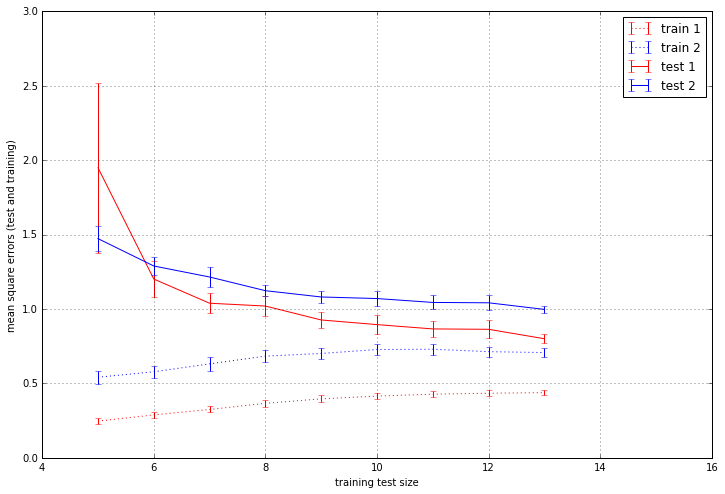

In [12]:
plt.errorbar(Ns,train1.mean(0),train1.std(0)/np.sqrt(repetitions),color='r',fmt=':')
plt.errorbar(Ns,train2.mean(0),train2.std(0)/np.sqrt(repetitions),color='b',fmt=':')
plt.errorbar(Ns,test1.mean(0),test1.std(0)/np.sqrt(repetitions),color='r')
plt.errorbar(Ns,test2.mean(0),test2.std(0)/np.sqrt(repetitions),color='b')
plt.grid()
plt.xlim(4,16)
plt.xlabel('training test size')
plt.ylabel('mean square errors (test and training)')
plt.legend(['train 1','train 2','test 1','test 2']);

## Time Series Prediction
An example where the linear model can be used is in time series
prediction. To illustrate this, consider the example of the sunspot
measurements. The number of sunspots oscillates almost periodically
over a period of some years. The average number of sunspots has been
measured yearly since 1700. Imagine we want to predict the average
number of sunspots next year. The linear model can be used for this.

Let the number of sunspots in year $n$ be $x_n$.  Let's assume that
the number of sunspots in year $n$ only depends on the number of
sunspots in the previous $d$ years. This is reasonable since there
must be a limit as to how far back one can expect a correlation. This
can be expressed as
\begin{equation}
  x_n = f(x_{n-1}, x_{n-2}, \ldots x_{n-d}). \qquad (10)
\end{equation}
Approximating the function $f$ with a linear model gives
\begin{equation}
  x_n = w_0 + \sum_{j=1}^d w_j x_{n-j}.\qquad (11)
\end{equation}
This corresponds to equation (1), and hence is the same
problem given by equations (2) to (7), where
the training set is given by
\begin{equation}
  \left.
  \begin{array}{ccl}
    \mathbf x_n &=& (1, x_{n-d}, \ldots , x_{n-1})^\top\\
    t_n &=& x_n
  \end{array} \right\} \;\; n = 1,\ldots,N-d-1. \qquad (12)
\end{equation}
The weights can be found using equation (7), and the
predicted value, $x_{n+1}$, can be found from
\begin{equation}
  x_{n} = y(\mathbf x_n) = \mathbf w^\top\mathbf x_n.
\end{equation}
In the context of sunspot time series prediction, the data set from 1700-1920 is
used for training while the data from 1921-1979 is used to test performance.


### Checkpoint 4.2:
Use the cells below to perform a time series prediction of
the number of sunspots with the data from 1700-1920 as training set.
Evaluate the test error on the set 1921-1979. Normalize the test error
per example by the total variance of the sunspot series.
Study the test error as function of the number of weights, $d$, (hence
years) included in the model. Which value of $d$ do you recommend?

In [55]:
d = 9
S = np.fromfile('sp.dat',sep='\t')
year, S = S.reshape(-1,2).T

var = S.var()
last_train = 221-d
N = S.shape[0]-d
T = S[d:]
X = np.array([S[i:N+i] for i in range(d)]).T
X = np.c_[np.ones(N,),X]
Xtrain = X[:last_train,:]
Xtest = X[last_train:,:]
Ttrain = T[:last_train]
Ttest = T[last_train:]

w = np.dot(np.linalg.pinv(Xtrain),Ttrain)
Ytrain = np.dot(Xtrain,w)
Ytest = np.dot(Xtest,w)
Y = np.dot(X,w)
errtrain = ((Ytrain-Ttrain)**2).mean()/var
errtest = ((Ytest-Ttest)**2).mean()/var

In [56]:
w, errtrain, errtest

(array([ 0.04407276,  0.11394512,  0.06625823, -0.05365341,  0.05501019,
        -0.14409196,  0.16254454, -0.1365558 , -0.46799471,  1.21661198]),
 0.13266814563443013,
 0.21777778940980111)

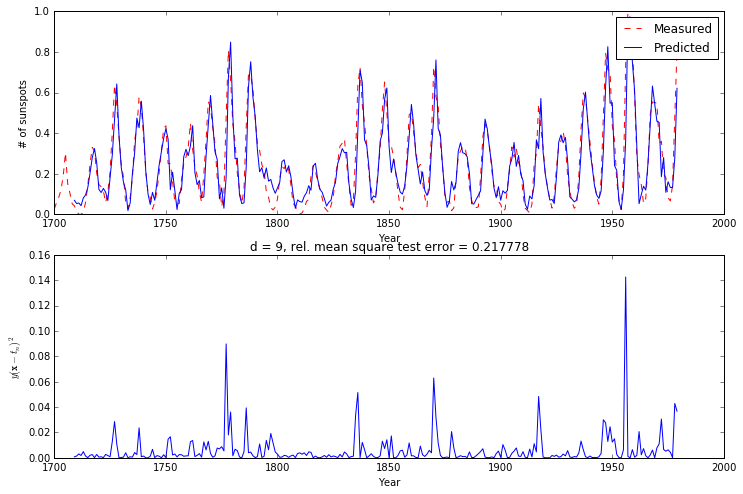

In [66]:
plt.subplot(211)
plt.plot(year,S,color='r',linestyle='--')
plt.plot(year[d:N+d],Y,color='b',linestyle='-')
plt.xlabel('Year')
plt.ylabel('# of sunspots')
plt.legend(['Measured','Predicted'])
plt.subplot(212)
plt.plot(year[d:N+d],(Y-T)**2,color='b',linestyle='-')
plt.xlabel('Year')
plt.ylabel(r'$y({\bf x}-t_n)^2$')
plt.title('d = %d, rel. mean square test error = %f'%(d,errtest));

### Bias-variance trade-off
The training set averages generalization error in the point $\mathbf x$
can be rewritten,
\begin{eqnarray}
{\mathbb E}_{\cal D}\left[ \left(y(\mathbf x)-{\mathbb E}_{
t}[t|\mathbf x]\right)^2 \right]
& =& {\mathbb E}_{\cal D}\left[\{y(\mathbf x)- {\mathbb E}_{\cal D}[y(\mathbf x)]\}^2\right] \nonumber\\
&+& \{{\mathbb E}_{\cal D}[y(\mathbf x)] -{\mathbb E}_{t}[t|\mathbf x]\}^2.\nonumber
\end{eqnarray}
Where ${\mathbb E}_{\cal D}$ is the expectation with respect to training sets. Note $y(\mathbf x) = y(\mathbf x;\mathbf w({\cal D}))$.

Hence the average error is split into a *variance* part, quantifying
 the variation among
solutions for different training sets and a *bias* part
quantifying the performance of the average model with respect to
best possible model ${\mathbb E}_{t}[t|\mathbf x] = \int tp(t|\mathbf x)dt$ (the conditional
mean of the output given the input)

### Checkpoint 4.3:
Use the cells below to measure the relative amount of variance and bias
for a linear model as in checkpoint 4.1 with two inputs and controlled by weight
decay. Plot the average generalization error, the bias error, and the variance
error for a large range of weight decay values. Comment on the two
regimes where the generalization error stems from variance and bias respectively.
What is the role of the weight decay in these two regimes.
Which weight decay value would you recommend?

In [13]:
w_t = np.array([1,2,.5])
noise_level = 1
d = w_t.shape[0]
N = 5
Ntest = 10000
repetitions = 100
alfmin = .03
alfmax = 100.
M = 10

alfs = np.empty(M)
meanarr = np.empty(M)
biasarr = np.empty(M)
variancearr = np.empty(M)
Ytest = np.empty((Ntest,repetitions))

In [14]:
n = 0
for k in range(M):
    alf = alfmin*(alfmax/alfmin)**((k-1)/(M-1))
    print("Weight decay # %d of %d decays" %(k,M))
    Xtest = np.random.randn(Ntest,d)
    Xtest[:,0] = np.ones(Ntest,)

    Ttest = np.dot(Xtest,w_t)
    noisetest = np.random.randn(Ntest,)*noise_level
    Ttest += noisetest
    for j in range(repetitions):
        Xtrain = np.random.randn(N,d)
        Xtrain[:,0] = np.ones(N,)
        Ttrain = np.dot(Xtrain,w_t)
        noise = np.random.randn(N,)*noise_level
        Ttrain += noise
        # Find optimal weights for the regularized model
        w = np.dot(np.linalg.pinv(np.dot(Xtrain.T,Xtrain) + alf*np.eye(d)),np.dot(Xtrain.T,Ttrain))
        # compute test set predictions
        Ytest[:,j] = np.dot(Xtest,w)
    Ybias = Ytest.mean(1)
    bias_error = ((Ybias-Ttest)**2).mean()
    mean_error = ((Ytest-Ttest[:,None])**2).mean()
    variance_error = mean_error-bias_error
    
    alfs[n] = alf
    meanarr[n] = mean_error
    biasarr[n] = bias_error
    variancearr[n] = variance_error
    n += 1

Weight decay # 0 of 10 decays
Weight decay # 1 of 10 decays
Weight decay # 2 of 10 decays
Weight decay # 3 of 10 decays
Weight decay # 4 of 10 decays
Weight decay # 5 of 10 decays
Weight decay # 6 of 10 decays
Weight decay # 7 of 10 decays
Weight decay # 8 of 10 decays
Weight decay # 9 of 10 decays


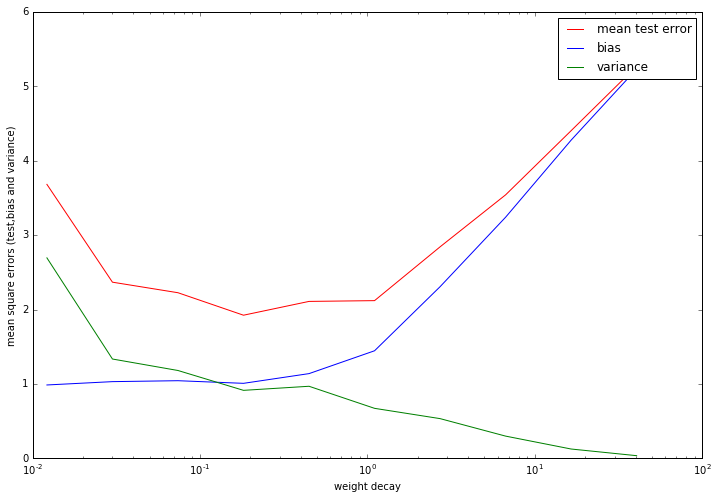

In [15]:
plt.semilogx(alfs,meanarr,'r')
plt.semilogx(alfs,biasarr,'b')
plt.semilogx(alfs,variancearr,'g')
plt.xlabel('weight decay')
plt.ylabel('mean square errors (test,bias and variance)')
plt.legend(['mean test error','bias','variance']);

### Challenge
Consider a linear model and simulated data sets of various size $N$ from a given (high dimen-
sional) weight vector, say $d = 300$, with random input vectors and additive normal noise. Plot
the learning curve (test error as function of sample size) for different values of the weight decay
$\alpha$.